In [38]:
import Data.dataset as ds
import Plots.plots as pl
import Calculations.monte_carlo as mc
import Calculations.calculations as cal
from fitter import Fitter, get_common_distributions, get_distributions


import numpy as np 
import statsmodels.api as sm 
import pylab as py 

import pylab 
import scipy.stats as stats
import matplotlib.pyplot as plt

from scipy.stats import expon, gamma

In [39]:
zone1 = ds.get_out1()
zone2 = ds.get_out2()

mass = ('Mass', 'Mass [kg]')
velocity = ('Velocity', 'Velocity [m/s]')
kinetic_energy = ('Kinetic Energy', 'Kinetic Energy [kJ]')
timedelta = ('Timedelta', 'TimeDiffHours')
n_simulations = 1000000
display(zone1)
display(zone2)
rocks_in_net = cal.calculate_cumulative_mass_since_clearing(zone1, zone2)
rocks_in_net

,Date,Time,Mass [kg],Velocity [m/s],Kinetic Energy [kJ],DateTime,TimeDiffHours
0,01/01/2019,09:00,194,8.4,6.844320,2019-01-01 09:00:00,0.0
1,01/01/2019,21:00,224,8.8,8.673280,2019-01-01 21:00:00,12.0
2,02/01/2019,14:00,3104,9.2,131.361280,2019-01-02 14:00:00,17.0
3,04/01/2019,15:00,228,8.0,7.296000,2019-01-04 15:00:00,49.0
4,05/01/2019,23:00,755,7.0,18.497500,2019-01-05 23:00:00,32.0
...,...,...,...,...,...,...,...
63,18/03/2019,16:00,167,8.9,6.614035,2019-03-18 16:00:00,28.0
64,22/03/2019,18:00,2847,7.0,69.751500,2019-03-22 18:00:00,98.0
65,26/03/2019,00:00,44,8.9,1.742620,2019-03-26 00:00:00,78.0
66,26/03/2019,06:00,45,8.4,1.587600,2019-03-26 06:00:00,6.0


,Date,Time,Mass [kg],Velocity [m/s],Kinetic Energy [kJ],DateTime,TimeDiffHours
0,01/01/2019,09:00,38,45.4,39.162040,2019-01-01 09:00:00,0.0
1,03/01/2019,06:00,187,41.6,161.807360,2019-01-03 06:00:00,45.0
2,04/01/2019,10:00,36,44.6,35.804880,2019-01-04 10:00:00,28.0
3,07/01/2019,14:00,6,41.2,5.092320,2019-01-07 14:00:00,76.0
4,11/01/2019,06:00,65,39.6,50.965200,2019-01-11 06:00:00,88.0
5,11/01/2019,16:00,58,33.2,31.964960,2019-01-11 16:00:00,10.0
6,14/01/2019,11:00,365,40.2,294.927300,2019-01-14 11:00:00,67.0
7,16/01/2019,02:00,22,46.5,23.784750,2019-01-16 02:00:00,39.0
8,18/01/2019,06:00,146,36.2,95.662120,2019-01-18 06:00:00,52.0
9,19/01/2019,17:00,29,38.3,21.269905,2019-01-19 17:00:00,35.0


,DateTime,Zone,Mass [kg],Velocity [m/s],Kinetic Energy [kJ],CumulativeMassInNet
0,2019-01-01 09:00:00,1,194,8.4,6.84432,0
68,2019-01-01 09:00:00,2,38,45.4,39.16204,0
1,2019-01-01 21:00:00,1,224,8.8,8.67328,232
2,2019-01-02 14:00:00,1,3104,9.2,131.36128,0
69,2019-01-03 06:00:00,2,187,41.6,161.80736,0
...,...,...,...,...,...,...
98,2019-03-25 14:00:00,2,63,43.2,58.78656,0
65,2019-03-26 00:00:00,1,44,8.9,1.74262,0
66,2019-03-26 06:00:00,1,45,8.4,1.58760,44
67,2019-03-27 16:00:00,1,312,5.8,5.24784,0


In [40]:
pl.show_scatter_stones(zone1, 1)
pl.show_scatter_stones(zone2, 2)

In [41]:
pl.show_compared_instances_by_time(zone1, zone2)
pl.show_event_timeing(zone1, zone2)
pl.show_time_between_events(zone1, zone2)
pl.show_box(zone1, zone2, timedelta)
pl.show_histogram(zone1, zone2, timedelta, 10)
pl.show_dist_plot(zone1, zone2, timedelta)

,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
gamma,0.009305,1083.141638,1089.800161,inf,0.136433,0.144822
expon,0.011535,1060.303179,1064.742194,inf,0.116051,0.295644
exponpow,0.013617,991.751234,998.409757,inf,0.204460,0.005713
rayleigh,0.016292,1067.605966,1072.044981,inf,0.168988,0.036290
norm,0.017017,1082.647998,1087.087014,inf,0.137568,0.138696


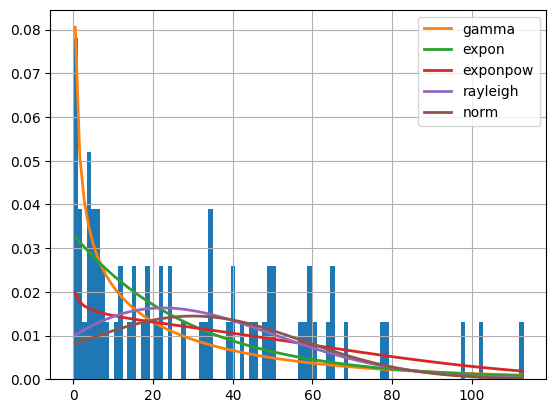

In [42]:
#zone1
f = Fitter(zone1['TimeDiffHours'], distributions=get_common_distributions())
f.fit()

f.summary()

,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
gamma,0.006085,1165.627059,1170.024267,inf,0.079356,0.978111
expon,0.006240,1166.517434,1169.448906,inf,0.124357,0.659935
exponpow,0.006321,1122.224223,1126.621430,inf,0.188987,0.178618
cauchy,0.006523,1261.312292,1264.243764,inf,0.174832,0.251141
rayleigh,0.006544,1161.750837,1164.682309,inf,0.169677,0.282354


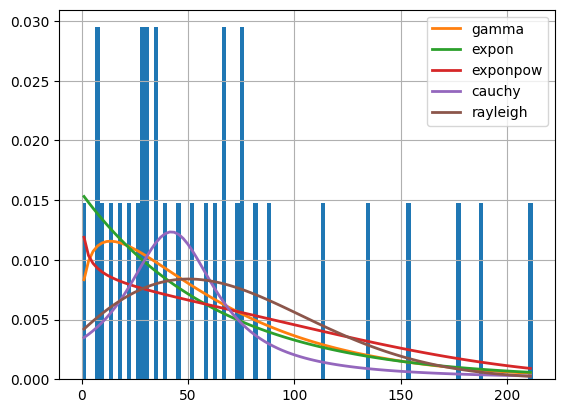

In [43]:
#zone2
f = Fitter(zone2['TimeDiffHours'], distributions=get_common_distributions())
f.fit()

f.summary()

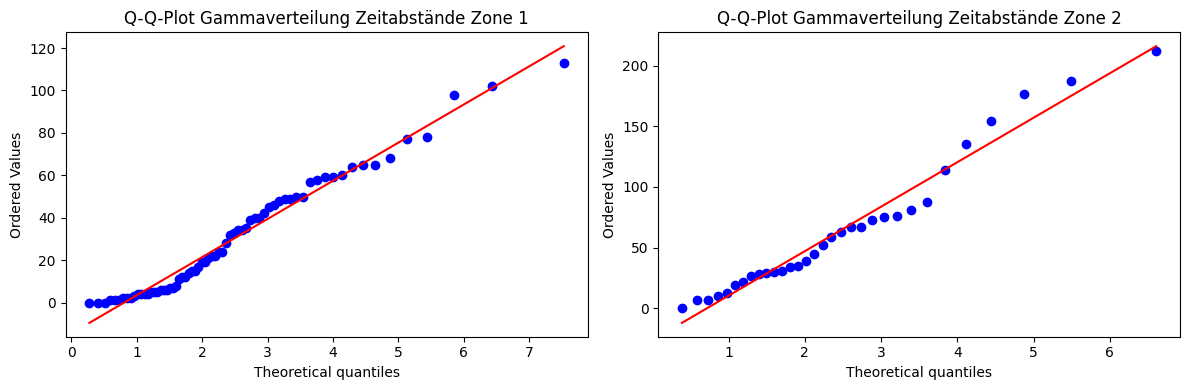

In [44]:
# Q-Q-Plot für Gamma-Verteilung
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

stats.probplot(zone1['TimeDiffHours'], dist=stats.gamma, sparams=(2.5,), plot=ax1)
ax1.set_title('Q-Q-Plot Gammaverteilung Zeitabstände Zone 1')

stats.probplot(zone2['TimeDiffHours'], dist=stats.gamma, sparams=(2.5,), plot=ax2)
ax2.set_title('Q-Q-Plot Gammaverteilung Zeitabstände Zone 2')

plt.tight_layout()  # Für eine bessere Anordnung der Subplots
plt.show()

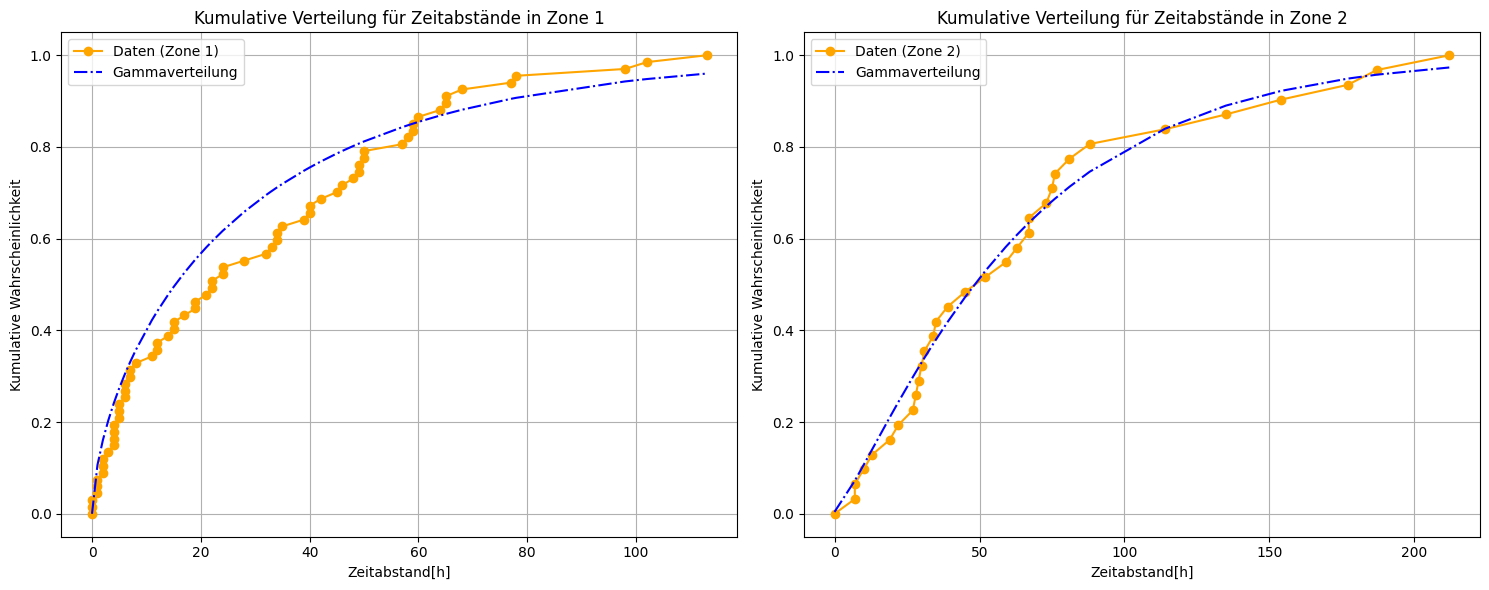

In [45]:
# Plot-Einstellungen
fig, axs = plt.subplots(1, 2, figsize=(15, 6))

# Zone 1

# Sortieren der Daten von Zone 1
sorted_data_zone1 = np.sort(zone1['TimeDiffHours'])

# Kumulative Verteilungsfunktion der Daten von Zone 1
cumulative_distribution_zone1 = np.linspace(0, 1, len(sorted_data_zone1))

# Parameter der Gamma-Verteilung aus den Daten von Zone 1
a_gamma_zone1, loc_gamma_zone1, scale_gamma_zone1 = gamma.fit(sorted_data_zone1)

# Gamma-Verteilungsfunktion für Zone 1
gamma_distribution_zone1 = gamma.cdf(sorted_data_zone1, a_gamma_zone1, loc_gamma_zone1, scale_gamma_zone1)

# Plot für Zone 1
axs[0].plot(sorted_data_zone1, cumulative_distribution_zone1, label='Daten (Zone 1)', marker='o', color='orange')
axs[0].plot(sorted_data_zone1, gamma_distribution_zone1, label='Gammaverteilung', linestyle='-.', color='blue')

axs[0].set_title('Kumulative Verteilung für Zeitabstände in Zone 1')
axs[0].set_xlabel('Zeitabstand[h]')
axs[0].set_ylabel('Kumulative Wahrscheinlichkeit')
axs[0].legend()
axs[0].grid(True)

# Zone 2

# Sortieren der Daten von Zone 2
sorted_data_zone2 = np.sort(zone2['TimeDiffHours'])

# Kumulative Verteilungsfunktion der Daten von Zone 2
cumulative_distribution_zone2 = np.linspace(0, 1, len(sorted_data_zone2))

# Parameter der Gamma-Verteilung aus den Daten von Zone 2
a_gamma_zone2, loc_gamma_zone2, scale_gamma_zone2 = gamma.fit(sorted_data_zone2)

# Gamma-Verteilungsfunktion für Zone 2
gamma_distribution_zone2 = gamma.cdf(sorted_data_zone2, a_gamma_zone2, loc_gamma_zone2, scale_gamma_zone2)

# Plot für Zone 2
axs[1].plot(sorted_data_zone2, cumulative_distribution_zone2, label='Daten (Zone 2)', marker='o', color='orange')
axs[1].plot(sorted_data_zone2, gamma_distribution_zone2, label='Gammaverteilung', linestyle='-.', color='blue')

axs[1].set_title('Kumulative Verteilung für Zeitabstände in Zone 2')
axs[1].set_xlabel('Zeitabstand[h]')
axs[1].set_ylabel('Kumulative Wahrscheinlichkeit')
axs[1].legend()
axs[1].grid(True)

# Anzeigen des Gesamtplots
plt.tight_layout()
plt.show()


In [46]:
pl.show_histogram(zone1, zone2, velocity, 1)
pl.show_box(zone1, zone2, velocity)
pl.show_dist_plot(zone1, zone2, velocity)

,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
norm,1.007418,559.582300,564.021316,inf,0.059355,0.958730
lognorm,1.007418,561.582245,568.240768,inf,0.059355,0.958727
gamma,1.010142,560.352868,567.011391,inf,0.063807,0.928074
chi2,1.017533,558.084152,564.742675,inf,0.075881,0.800376
exponpow,1.047920,542.377735,549.036258,inf,0.073655,0.827877


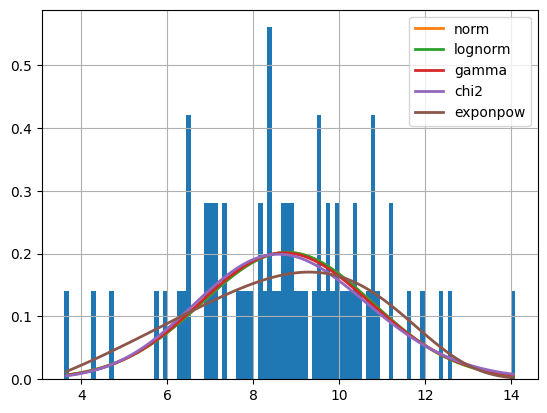

In [47]:
f = Fitter(zone1['Velocity [m/s]'], distributions=get_common_distributions())
f.fit()

f.summary()

,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
norm,0.607154,675.068739,678.000211,inf,0.104641,0.839121
lognorm,0.607154,677.069040,681.466248,inf,0.104643,0.839108
chi2,0.608647,677.413072,681.810279,inf,0.113398,0.763308
gamma,0.608798,677.225194,681.622402,inf,0.113424,0.763071
uniform,0.622910,618.538663,621.470135,inf,0.221065,0.074555


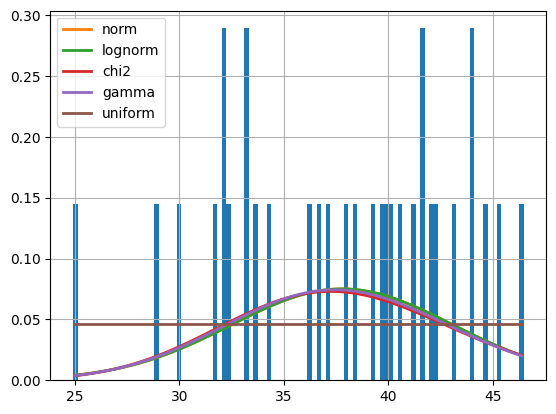

In [48]:
f = Fitter(zone2['Velocity [m/s]'], distributions=get_common_distributions())
f.fit()

f.summary()

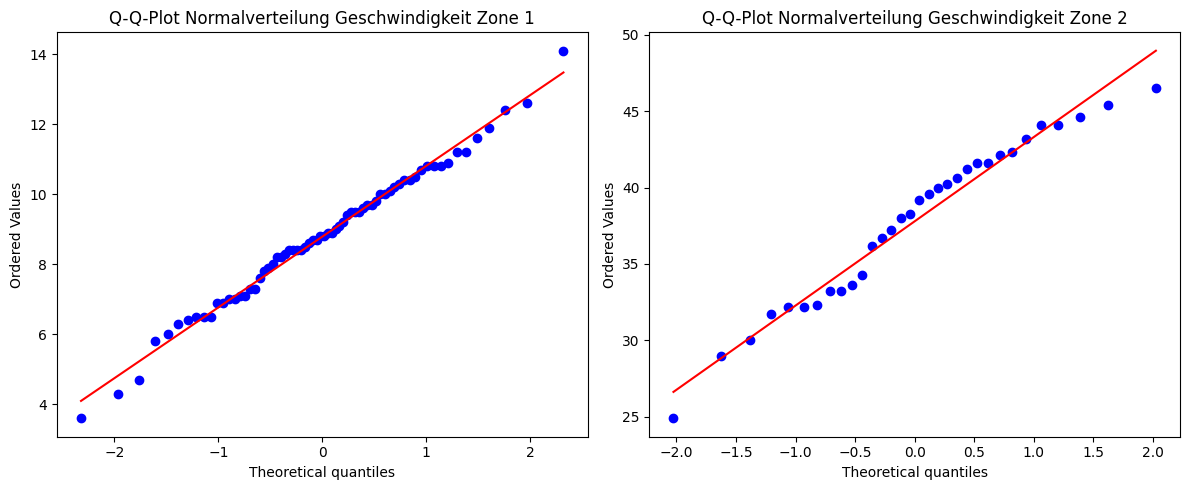

In [49]:
# Q-Q-Plot für Normalverteilung
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Q-Q-Plot für zone1
stats.probplot(zone1['Velocity [m/s]'], dist='norm', plot=ax1, fit=True)
ax1.set_title('Q-Q-Plot Normalverteilung Geschwindigkeit Zone 1')

# Q-Q-Plot für zone2
stats.probplot(zone2['Velocity [m/s]'], dist='norm', plot=ax2, fit=True)
ax2.set_title('Q-Q-Plot Normalverteilung Geschwindigkeit Zone 2')

plt.tight_layout()  # Für eine bessere Anordnung der Subplots
plt.show()

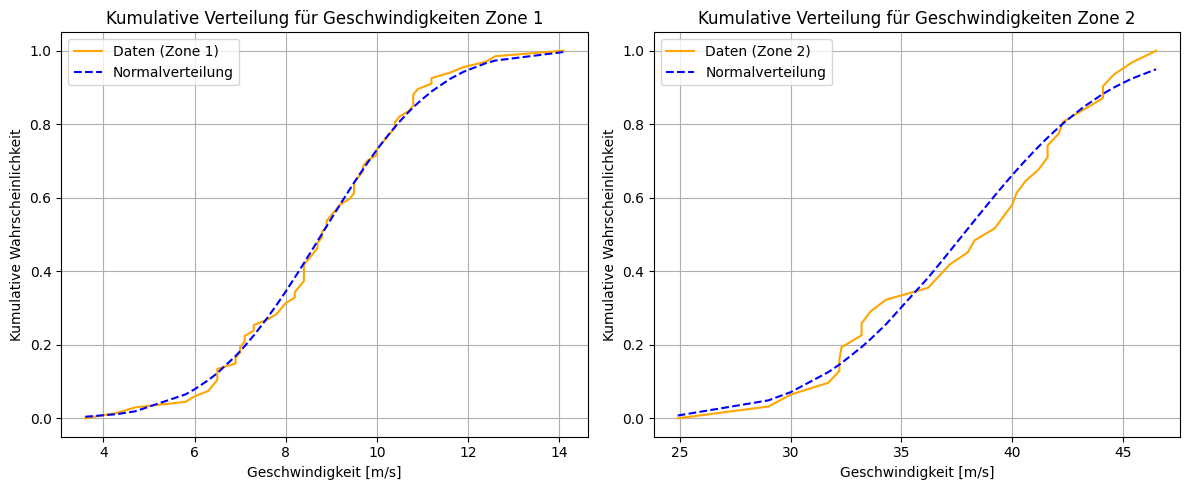

In [50]:
# Sortieren der Daten
sorted_data_zone1 = np.sort(zone1['Velocity [m/s]'])
sorted_data_zone2 = np.sort(zone2['Velocity [m/s]'])

# Kumulative Verteilungsfunktionen
cumulative_distribution_zone1 = np.linspace(0, 1, len(sorted_data_zone1))
cumulative_distribution_zone2 = np.linspace(0, 1, len(sorted_data_zone2))

# Theoretische kumulative Verteilung für Normalverteilung
normal_distribution_cdf_zone1 = stats.norm.cdf(sorted_data_zone1, np.mean(zone1['Velocity [m/s]']), np.std(zone1['Velocity [m/s]']))
normal_distribution_cdf_zone2 = stats.norm.cdf(sorted_data_zone2, np.mean(zone2['Velocity [m/s]']), np.std(zone2['Velocity [m/s]']))

# Erstellen von zwei Subplots nebeneinander
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Kumulative Verteilung für zone1
ax1.plot(sorted_data_zone1, cumulative_distribution_zone1, color='orange', label='Daten (Zone 1)')
ax1.plot(sorted_data_zone1, normal_distribution_cdf_zone1, color='blue', linestyle='--', label='Normalverteilung')
ax1.set_title('Kumulative Verteilung für Geschwindigkeiten Zone 1')
ax1.set_xlabel('Geschwindigkeit [m/s]')
ax1.set_ylabel('Kumulative Wahrscheinlichkeit')
ax1.legend(loc='upper left')
ax1.grid(True)  # Gitter hinzufügen

# Kumulative Verteilung für zone2
ax2.plot(sorted_data_zone2, cumulative_distribution_zone2, color='orange', label='Daten (Zone 2)')
ax2.plot(sorted_data_zone2, normal_distribution_cdf_zone2, color='blue', linestyle='--', label='Normalverteilung')
ax2.set_title('Kumulative Verteilung für Geschwindigkeiten Zone 2')
ax2.set_xlabel('Geschwindigkeit [m/s]')
ax2.set_ylabel('Kumulative Wahrscheinlichkeit')
ax2.legend(loc='upper left')
ax2.grid(True)  # Gitter hinzufügen

plt.tight_layout()  # Für eine bessere Anordnung der Subplots
plt.show()

In [51]:
pl.show_histogram(zone1, zone2, mass, 100)
pl.show_box(zone1, zone2, mass)
pl.show_dist_plot(zone1, zone2, mass)

,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
lognorm,0.000015,1810.753526,1817.412049,inf,0.065387,0.914829
cauchy,0.000018,1940.238453,1944.677468,inf,0.180140,0.021090
expon,0.000019,1790.287904,1794.726919,inf,0.112432,0.331307
gamma,0.000021,1765.999570,1772.658093,inf,0.117606,0.281179
exponpow,0.000025,1710.846109,1717.504632,inf,0.205474,0.005390


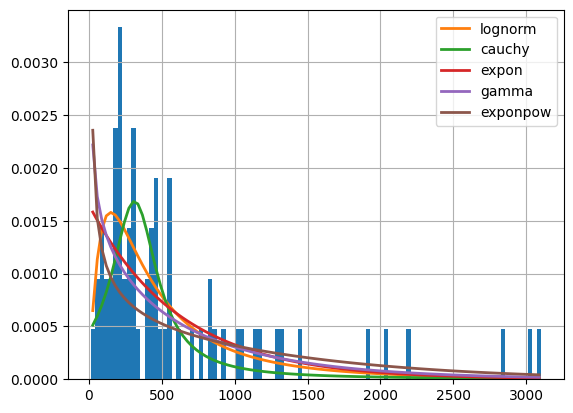

In [52]:
f = Fitter(zone1['Mass [kg]'], distributions=get_common_distributions())
f.fit()

f.summary()

,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
cauchy,0.001599,1499.254141,1502.185613,inf,0.184306,0.200537
expon,0.001801,1332.596394,1335.527866,inf,0.147827,0.444047
exponpow,0.001874,1322.171181,1326.568388,inf,0.150116,0.424961
gamma,0.002016,1361.275169,1365.672377,inf,0.218622,0.080077
rayleigh,0.002129,1339.323451,1342.254923,inf,0.294552,0.005902


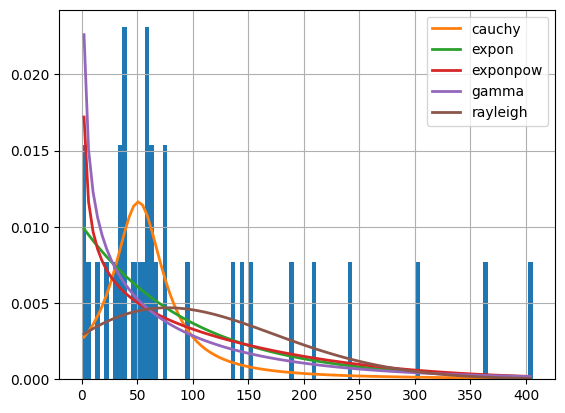

In [53]:
f = Fitter(zone2['Mass [kg]'], distributions=get_common_distributions())
f.fit()

f.summary()

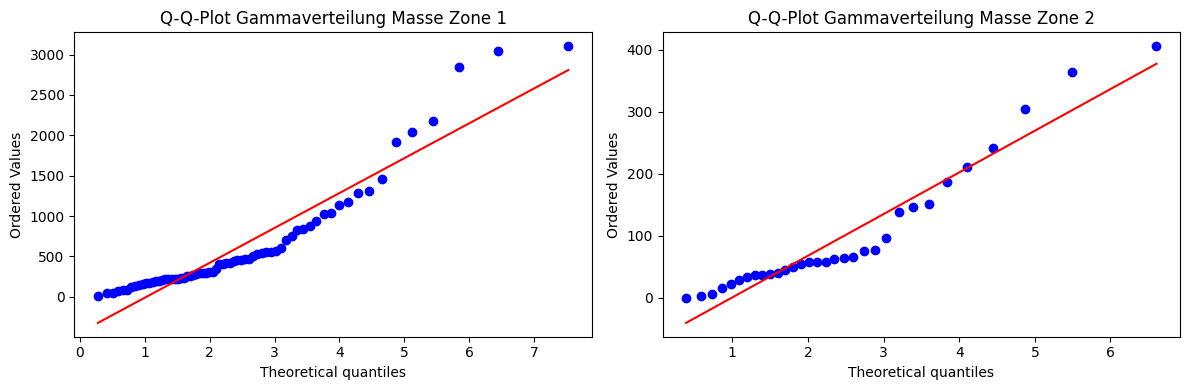

In [54]:
# Q-Q-Plot für Gamma-Verteilung
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

stats.probplot(zone1['Mass [kg]'], dist=stats.gamma, sparams=(2.5,), plot=ax1)
ax1.set_title('Q-Q-Plot Gammaverteilung Masse Zone 1')

stats.probplot(zone2['Mass [kg]'], dist=stats.gamma, sparams=(2.5,), plot=ax2)
ax2.set_title('Q-Q-Plot Gammaverteilung Masse Zone 2')

plt.tight_layout()  # Für eine bessere Anordnung der Subplots
plt.show()

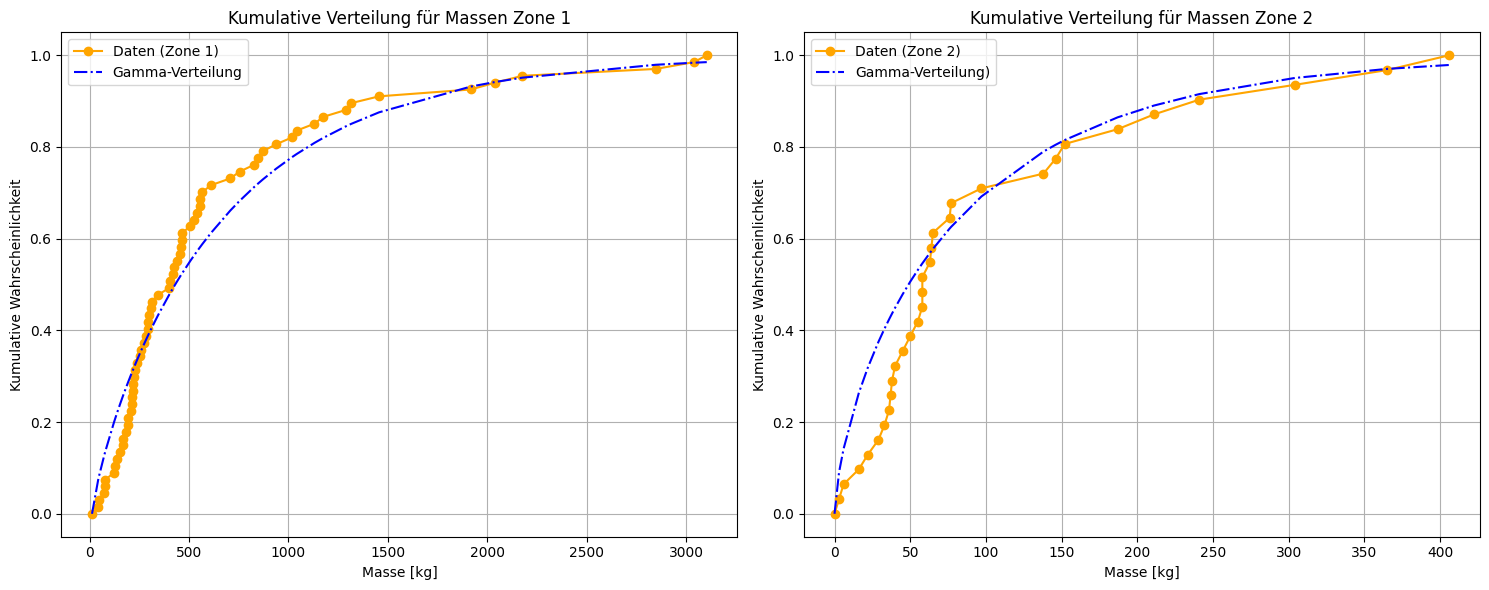

In [55]:
# Plot-Einstellungen
fig, axs = plt.subplots(1, 2, figsize=(15, 6))

# Zone 1

# Sortieren der Daten von Zone 1
sorted_data_zone1 = np.sort(zone1['Mass [kg]'])

# Kumulative Verteilungsfunktion der Daten von Zone 1
cumulative_distribution_zone1 = np.linspace(0, 1, len(sorted_data_zone1))

# Parameter der Gamma-Verteilung aus den Daten von Zone 1
a_gamma_zone1, loc_gamma_zone1, scale_gamma_zone1 = gamma.fit(sorted_data_zone1)

# Gamma-Verteilungsfunktion für Zone 1
gamma_distribution_zone1 = gamma.cdf(sorted_data_zone1, a_gamma_zone1, loc_gamma_zone1, scale_gamma_zone1)

# Plot für Zone 1
axs[0].plot(sorted_data_zone1, cumulative_distribution_zone1, label='Daten (Zone 1)', marker='o', color='orange')
axs[0].plot(sorted_data_zone1, gamma_distribution_zone1, label='Gamma-Verteilung', linestyle='-.', color='blue')

axs[0].set_title('Kumulative Verteilung für Massen Zone 1')
axs[0].set_xlabel('Masse [kg]')
axs[0].set_ylabel('Kumulative Wahrscheinlichkeit')
axs[0].legend()
axs[0].grid(True)

# Zone 2

# Sortieren der Daten von Zone 2
sorted_data_zone2 = np.sort(zone2['Mass [kg]'])

# Kumulative Verteilungsfunktion der Daten von Zone 2
cumulative_distribution_zone2 = np.linspace(0, 1, len(sorted_data_zone2))

# Parameter der Gamma-Verteilung aus den Daten von Zone 2
a_gamma_zone2, loc_gamma_zone2, scale_gamma_zone2 = gamma.fit(sorted_data_zone2)

# Gamma-Verteilungsfunktion für Zone 2
gamma_distribution_zone2 = gamma.cdf(sorted_data_zone2, a_gamma_zone2, loc_gamma_zone2, scale_gamma_zone2)

# Plot für Zone 2
axs[1].plot(sorted_data_zone2, cumulative_distribution_zone2, label='Daten (Zone 2)', marker='o', color='orange')
axs[1].plot(sorted_data_zone2, gamma_distribution_zone2, label='Gamma-Verteilung)', linestyle='-.', color='blue')

axs[1].set_title('Kumulative Verteilung für Massen Zone 2')
axs[1].set_xlabel('Masse [kg]')
axs[1].set_ylabel('Kumulative Wahrscheinlichkeit')
axs[1].legend()
axs[1].grid(True)

# Anzeigen des Gesamtplots
plt.tight_layout()
plt.show()


In [56]:
pl.show_histogram_kinetic_energy(zone1, zone2)
pl.show_box(zone1, zone2, kinetic_energy)
pl.show_dist_plot(zone1, zone2, kinetic_energy)